# Task 3: SHAP Explainability for LightGBM Fraud Detection

In [12]:
import shap
import pickle
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
shap.initjs()


In [13]:

# Load feature names
with open("feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)
    
X_train_resampled = np.load("../trained_samples/X_train_resampled.npy")
y_train_resampled = np.load("../trained_samples/y_train_resampled.npy")
X_test = pd.DataFrame(np.load("../trained_samples/X_test.npy"), columns=feature_names)

lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42, n_estimators=100)
lgb_model.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Info] Number of positive: 95872, number of negative: 95872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3745
[LightGBM] [Info] Number of data points in the train set: 191744, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

## SHAP Explainer Setup

In [14]:
explainer = shap.Explainer(lgb_model)
shap_values = explainer(X_test)


## SHAP Summary Plot

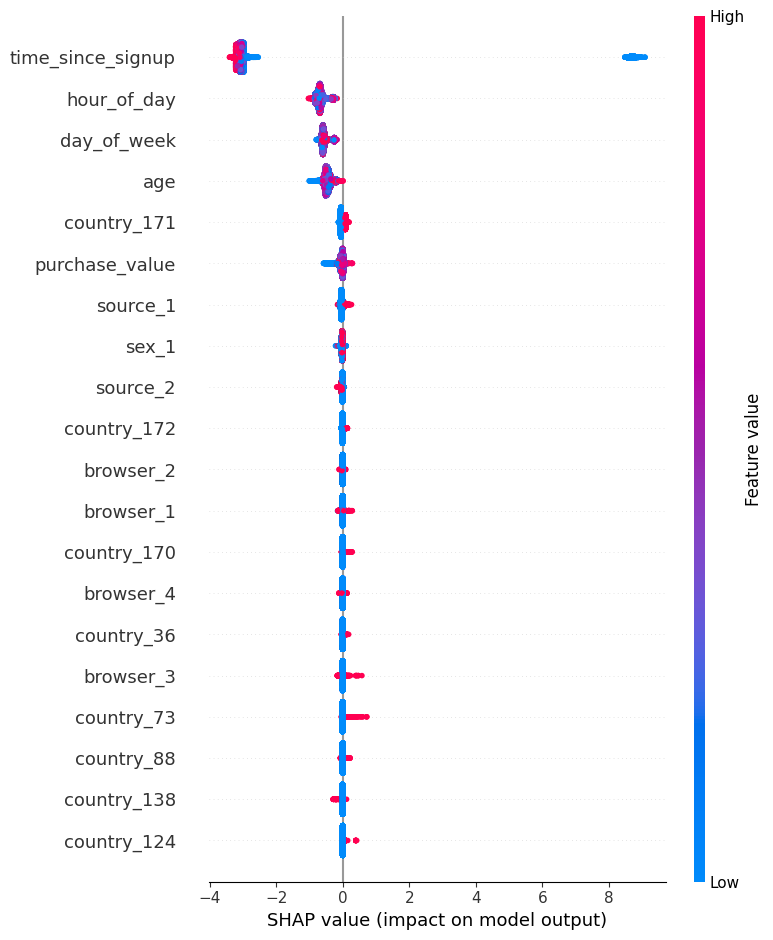

In [15]:
shap.summary_plot(shap_values, X_test)


## SHAP Dependence Plot (Top Feature)

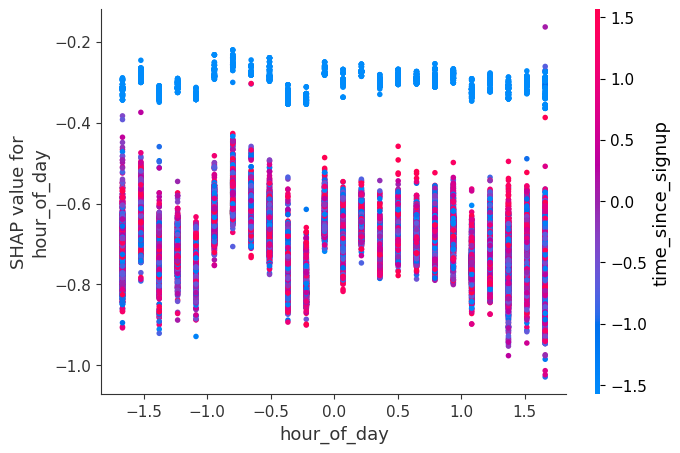

In [ ]:
shap.dependence_plot(0, shap_values.values, X_test)


## SHAP Force Plot (Single Prediction Explanation)

In [21]:
shap.plots.force(shap_values[0])
